# **Text to image Diffusion modeling**
- Diffusion model을 활용하여 프롬프트 문장을 통해 이미지를 생성합니다.
- https://velog.io/@hewas1230/StableDiffusion
- https://huggingface.co

In [1]:
!nvidia-smi
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

# accelerate added
!pip install accelerate

!pip install --upgrade diffusers transformers scipy

Mon Feb 19 07:23:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import output
output.enable_custom_widget_manager()
from huggingface_hub import notebook_login

notebook_login()

In [7]:
import tensorflow as tf
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
prompt = "Draw an cute, simple image of a person who is addicted to a smartphone"

def generate_image(prompt, model, num_inference_steps):
    with tf.device('/GPU:0'):
        image = model(prompt, num_inference_steps=num_inference_steps).images[0]
    return image

num_inference_steps = 12
generated_image = generate_image(prompt, pipe, num_inference_steps=num_inference_steps)

# 생성된 이미지 출력
print(generated_image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

<PIL.Image.Image image mode=RGB size=512x512 at 0x789D2473D2A0>


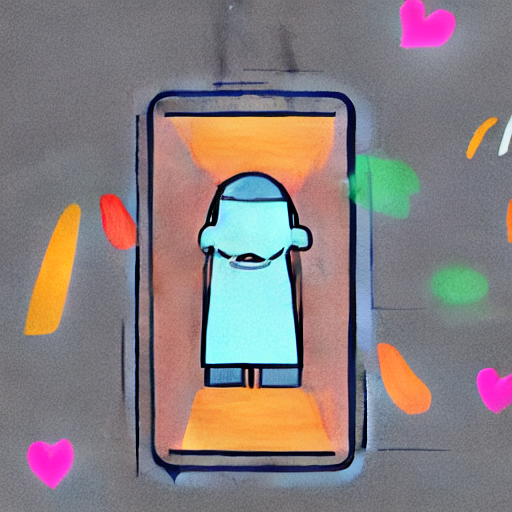

In [8]:
generated_image

In [ ]:
# Pytorch, CPU 기반의 모델 저장 코드

'''

import torch
from diffusers import StableDiffusionPipeline
import pickle

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
prompt = "Draw an cute, simple image of a person who is addicted to a smartphone"

with open("diffusion_model_cpu.pkl", "wb") as f:
    pickle.dump(pipe, f)

with open("diffusion_model_cpu.pkl", "rb") as f:
    loaded_pipe = pickle.load(f)

def generate_image(prompt, model, num_inference_steps):
    with torch.no_grad():
        image = model(prompt, num_inference_steps=num_inference_steps).images[0]
    return image

num_inference_steps = 60
generated_image = generate_image(prompt, loaded_pipe, num_inference_steps=num_inference_steps)
print(generated_image)

'''